# Functions

In [36]:
import numpy as np
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"

R = 8.314  # gas constant in J/mol-K
def CpA(T):
    ''' CpA is the heat capacity of Methane in J/mol-K as a function of temperature in K'''
    if T < 1300:
        return -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / ((T / 1000)**2))
    else:
        return 85.81217 + (11.26467 * (T / 1000)) - (2.114146 * (T / 1000)**2) + (0.138190 * (T / 1000)**3) - (26.42221 / ((T / 1000)**2))

def CpB(T):
    ''' CpB is the heat capacity of Water in J/mol-K as a function of temperature in K'''
    return 30.09200 + (6.832514 * (T / 1000)) + (6.793435 * (T / 1000)**2) - (2.534480 * (T / 1000)**3) + (0.082139 / ((T / 1000)**2))

def CpC(T):
    ''' CpC is the heat capacity of Oxygen in J/mol-K as a function of temperature in K'''
    if T < 700:
        return 31.32234 - (20.23532 * (T / 1000)) + (57.86644 * (T / 1000)**2) - (36.50624 * (T / 1000)**3) + (0.0007374 / ((T / 1000)**2))
    else:
        return 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / ((T / 1000)**2))

def CpD(T):
    ''' CpD is the heat capacity of Carbon Monoxide in J/mol-K as a function of temperature in K'''
    if T < 1300:
        return 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / ((T / 1000)**2))
    else:
        return 35.15070 + (1.300095 * (T / 1000)) - (0.205921 * (T / 1000)**2) + (0.01355 * (T / 1000)**3) - (3.28278 / ((T / 1000)**2))

def CpE(T):
    ''' CpE is the heat capacity of Carbon Dioxide in J/mol-K as a function of temperature in K'''
    if T < 1200:
        return 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / ((T / 1000)**2))
    else:
        return 58.16639 + (2.720074 * (T / 1000)) - (0.492289 * (T / 1000)**2) + (0.038844 * (T / 1000)**3) - (6.447293 / ((T / 1000)**2))

def CpF(T):
    ''' CpF is the heat capacity of Hydrogen in J/mol-K as a function of temperature in K'''
    if T < 1000:
        return 33.066178 - (11.363417 * (T / 1000)) + (11.432816 * (T / 1000)**2) - (2.772874 * (T / 1000)**3) - (0.158558 / ((T / 1000)**2))
    else:
        return 18.563083 + (12.257357 * (T / 1000)) - (2.859786 * (T / 1000)**2) + (0.268238 * (T / 1000)**3) + (1.977990 / ((T / 1000)**2))
def CpG(T):
    ''' CpG is the heat capacity of Nitrogen in J/mol-K as a function of temperature in K'''
    if T < 500:
        return 28.98641 + (1.853978 * (T / 1000)) - (9.647459 * (T / 1000)**2) + (16.63537 * (T / 1000)**3) + (0.000117 / ((T / 1000)**2))
    else:
        return 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / ((T / 1000)**2))


def Hrxn1(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 206.2e3 + 3 * integral_CpF + integral_CpD - integral_CpB - integral_CpA

def Hrxn2(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 164.9e3 + 4 * integral_CpF + integral_CpE - 2 * integral_CpB - integral_CpA

def Hrxn3(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    return -41.1e3 + integral_CpF + integral_CpE - integral_CpB - integral_CpD

def Hrxn4(T):
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpC = quad(CpC, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return -802.7e3 + 2 * integral_CpB + integral_CpE - 2 * integral_CpC - integral_CpA

def rates(T):
    k1 = 1.17e15 * np.exp(-240100 / (R * T))
    k2 = 2.83e14 * np.exp(-243900 / (R * T))
    k3 = 5.43e5 * np.exp(-67130 / (R * T))
    k4a = 8.11e5 * np.exp(-86000 / (R * T))
    k4b = 6.82e5 * np.exp(-86000 / (R * T))

    return k1, k2, k3, k4a, k4b

def Keqm(T):
    KI = np.exp(-26830 / T + 30.114) # equilibrium constant for steam reforming (reaction 1)
    KIII = np.exp(4400 / T - 4.036)  # equilibrium constant for water gas shift (reaction 3)
    KII = KI * KIII # equilibrium constant for steam reforming (reaction 2)
    return KI, KII, KIII

# Part 1

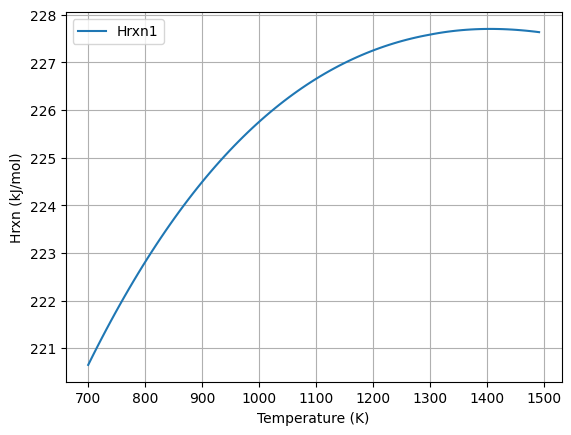

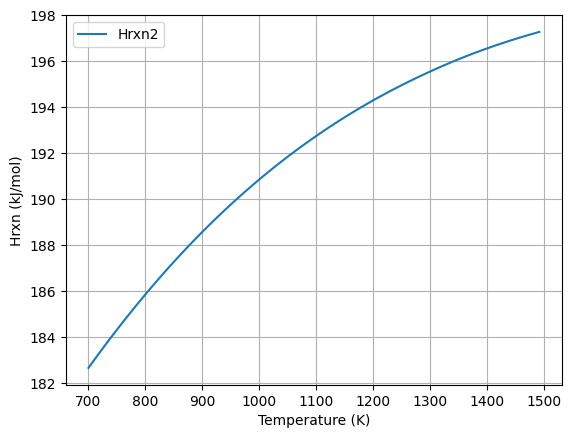

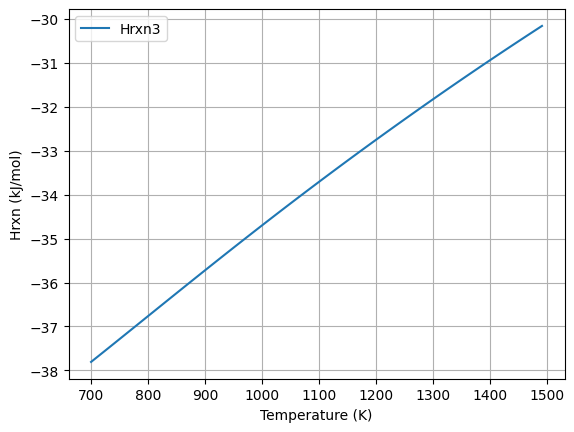

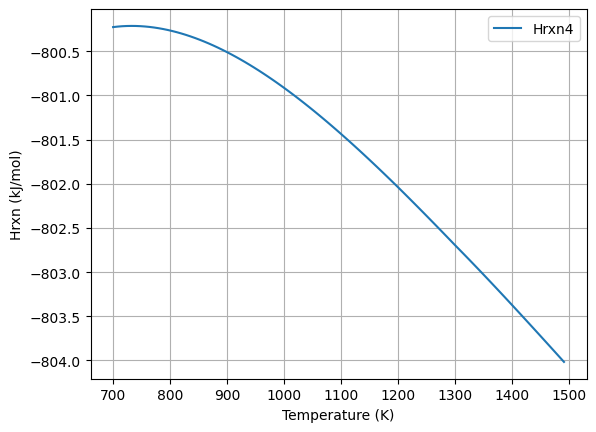

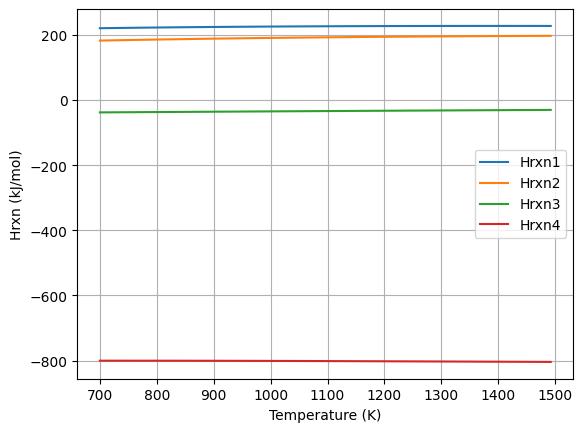

In [37]:
T_span = [700 + 8*i for i in range(100)]
H1 = [Hrxn1(T)/1000 for T in T_span]
H2 = [Hrxn2(T)/1000 for T in T_span]
H3 = [Hrxn3(T)/1000 for T in T_span]
H4 = [Hrxn4(T)/1000 for T in T_span]
for i in range(4):
    plt.figure()
    plt.plot(T_span, [H1, H2, H3, H4][i])
    plt.xlabel('Temperature (K)')
    plt.ylabel('Hrxn (kJ/mol)')
    plt.legend([f'Hrxn{i+1}'])
    plt.grid()
plt.figure()
plt.plot(T_span, H1, label='Hrxn1')
plt.plot(T_span, H2, label='Hrxn2')
plt.plot(T_span, H3, label='Hrxn3')
plt.plot(T_span, H4, label='Hrxn4')
plt.xlabel('Temperature (K)')
plt.ylabel('Hrxn (kJ/mol)')
plt.grid()
plt.legend()

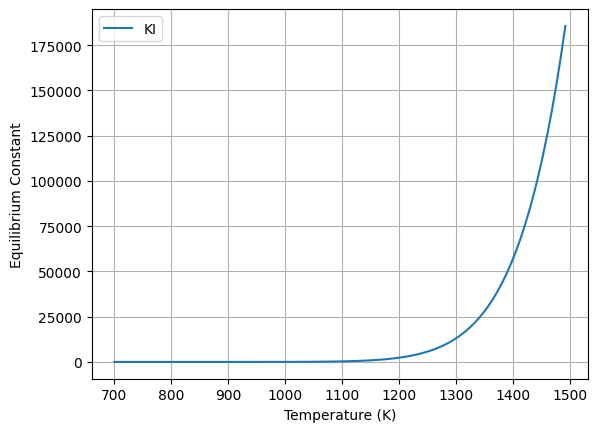

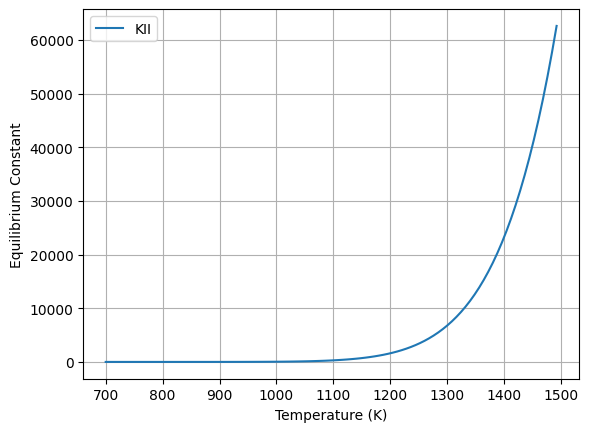

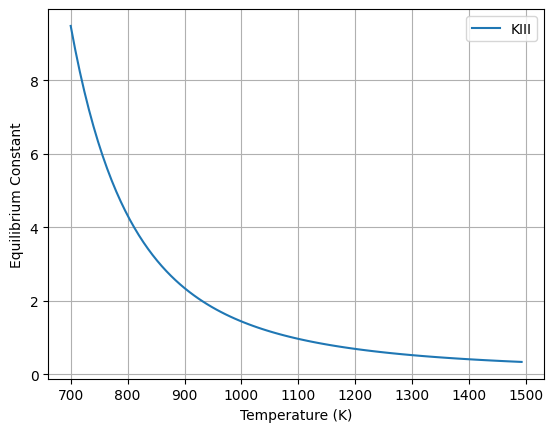

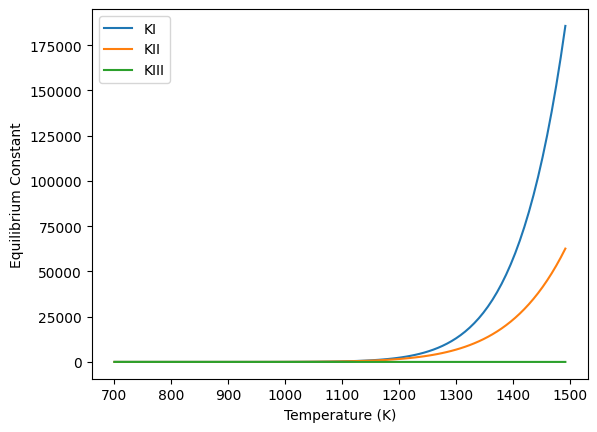

In [38]:
KI = [Keqm(T)[0] for T in T_span]
KII = [Keqm(T)[1] for T in T_span]
KIII = [Keqm(T)[2] for T in T_span]

for i in range(3):
    plt.figure()
    plt.plot(T_span, [KI, KII, KIII][i])
    plt.xlabel('Temperature (K)')
    plt.ylabel('Equilibrium Constant')
    plt.legend([f'K{"I"*(i+1)}'])
    plt.grid()

plt.figure()
plt.plot(T_span, KI, label='KI')
plt.plot(T_span, KII, label='KII')
plt.plot(T_span, KIII, label='KIII')
plt.xlabel('Temperature (K)')
plt.ylabel('Equilibrium Constant')
plt.legend()


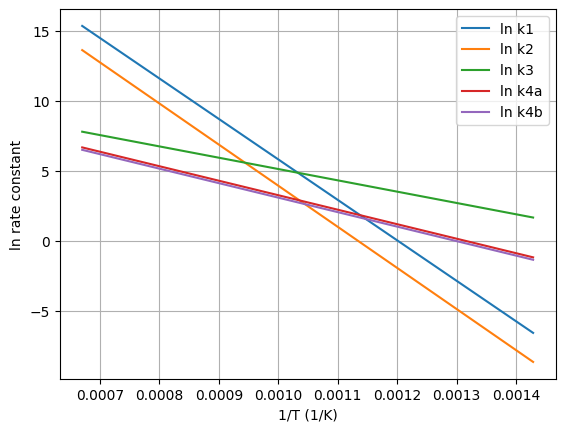

In [39]:
T_span = [700 + 8*i for i in range(100)]
Tinv = [1/T for T in T_span]
def lnrates(T):
    k1 = 1.17e15 * np.exp(-240100 / (R * T))
    k2 = 2.83e14 * np.exp(-243900 / (R * T))
    k3 = 5.43e5 * np.exp(-67130 / (R * T))
    k4a = 8.11e5 * np.exp(-86000 / (R * T))
    k4b = 6.82e5 * np.exp(-86000 / (R * T))

    # rewrite the rate constants in terms of ln(k) = ln(A) - E/RT
    lnk1 = np.log(1.17e15) - 240100 / (R * T)
    lnk2 = np.log(2.83e14) - 243900 / (R * T)
    lnk3 = np.log(5.43e5) - 67130 / (R * T)
    lnk4a = np.log(8.11e5) - 86000 / (R * T)
    lnk4b = np.log(6.82e5) - 86000 / (R * T)
    return lnk1, lnk2, lnk3, lnk4a, lnk4b
plt.figure()
# plot ln(k) vs 1/T
lnk1 = [lnrates(T)[0] for T in T_span]
lnk2 = [lnrates(T)[1] for T in T_span]
lnk3 = [lnrates(T)[2] for T in T_span]
lnk4a = [lnrates(T)[3] for T in T_span]
lnk4b = [lnrates(T)[4] for T in T_span]

plt.plot(Tinv, lnk1, label='ln k1')
plt.plot(Tinv, lnk2, label='ln k2')
plt.plot(Tinv, lnk3, label='ln k3')
plt.plot(Tinv, lnk4a, label='ln k4a')
plt.plot(Tinv, lnk4b, label='ln k4b')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln rate constant')
plt.grid()
plt.legend()

# Part 2

In [40]:
def shift_ode(w, F):
    # isothermal, isobaric
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    # Constants
    R = 8.314  # J/mol-K

    # Rate constants
    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    # Reaction rates
    rate1 = (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = (k4a * pCH4 * pO2 / sigma**2 + k4b * pCH4 * pO2 / sigma)

    # Differential equations
    dFdw = np.zeros(9)
    dFdw[0] = -rate1 - rate2 - rate4  # CH4
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4  # H2O
    dFdw[2] = -rate4  # O2
    dFdw[3] = rate1 - rate3  # CO
    dFdw[4] = rate2 + rate3  # CO2
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3  # H2
    dFdw[6] = 0  # N2 (inert)
    dFdw[7] = 0  # Temperature (no dynamic update here)
    dFdw[8] = 0  # Pressure (no dynamic update here)
    return dFdw

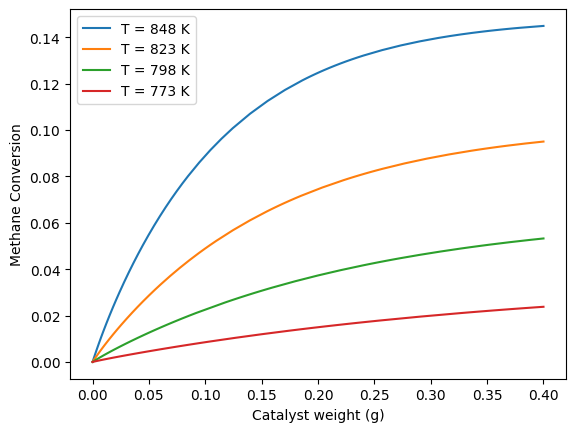

In [41]:
# Initial conditions
T_list = [848, 823, 798, 773] 
# Integration range
w_span = [0, 0.0004]  # Catalyst weight range, corresponds to 0.0004
for T in T_list:
    F0 = [1 / 3600, 3 / 3600, 0, 0, 0, 1.25 / 3600, 0, T, 10]
    sol = solve_ivp(shift_ode, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    # covert to grams
    w = w * 1000
    F = sol.y.T
    # get conversion
    FCH4 = F[:, 0]
    FCH4in = F0[0]
    X = (FCH4in - FCH4) / FCH4in
    # Plot
    plt.plot(w, X, label='T = {} K'.format(T))
    plt.xlabel('Catalyst weight (g)')
    plt.ylabel('Methane Conversion')
    plt.grid()
    plt.legend()

In [42]:
def shiftb(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / (pH2**2.5)) * (pCH4 * pH2O - ((pH2**3) * pCO) / KI) / (sigma**2)
    rate2 = 0.06 * (k2 / (pH2**3.5)) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / (sigma**2)
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / (sigma**2)
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros(9)
    # Methane
    dFdw[0] = -rate1 - rate2 - rate4
    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4
    # Oxygen (O2)
    dFdw[2] = -2 * rate4
    #dFdw[2] = - rate4
    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3
    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2 + rate3
    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3
    # Nitrogen (N2)
    dFdw[6] = 0
    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp
    #Pressure change
    dFdw[8] = 0

    return dFdw

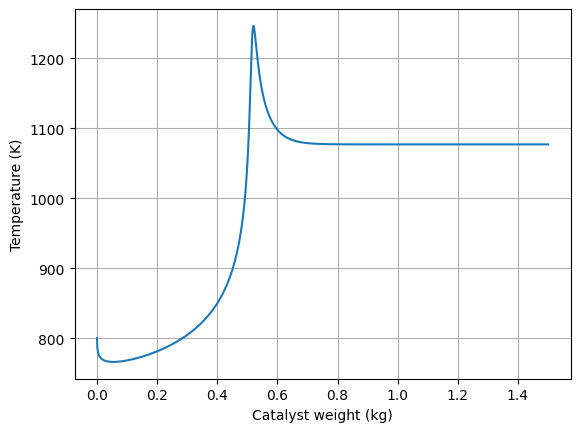

In [43]:
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
sol = solve_ivp(shiftb, [0, 1.5], F0, method='LSODA', rtol=1e-6, atol=1e-9)
F = sol.y.T
w = sol.t
T = F[:, 7]
plt.plot(w, T)
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Temperature (K)')
plt.grid()


In [44]:

def visc(y, T):
    # Constants
    Mw = np.array([16.043, 44.01, 28.01, 18.015, 2.016, 28.014, 31.999])
    Vc = np.array([98.6, 94.07, 93.1, 55.95, 65.00, 90.1, 73.37])
    Tc = np.array([190.56, 304.12, 132.85, 647.14, 33.25, 126.2, 154.58])
    w = np.array([0.011, 0.225, 0.045, 0.344, -0.216, -0.037, 0])
    dip = np.array([0.0, 0.0, 0.1, 1.8, 0, 0, 0])
    kap = np.array([0, 0, 0, 0.076, 0, 0, 0])
    # Normalize to get mole fractions
    y = y / np.sum(y)
    # Calculate individual species viscosities
    Tstar = 1.2593 * T / Tc
    dipr = 131.1 * dip / np.sqrt(Vc * Tc)
    fc = 1 - 0.2756 * w + 0.059035 * dipr**4 + kap
    ohm = 1.16145 * Tstar**-0.14874 + 0.52487 * np.exp(-0.77320 * Tstar) + 2.16178 * np.exp(-2.43787 * Tstar)
    vct = Vc**(2/3)
    visc = 40.785 * fc * (Mw * T)**0.5 / (vct * ohm)
    # Calculate mixture viscosity
    phi = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        for j in range(len(y)):
            term1 = (visc[i] / visc[j])**0.5
            term2 = (Mw[j] / Mw[i])**0.25
            term3 = Mw[i] / Mw[j]
            phi[i, j] = (1 + term1 * term2)**2 / (8 * (1 + term3))**0.5

    sumb = 0
    for i in range(len(y)):
        suma = 0
        for j in range(len(y)):
            suma += y[j] * phi[i, j]
        sumb += y[i] * visc[i] / suma

    viscm = sumb * 1e-6 / 10 # Convert to Pascals-seconds
    return viscm

def shiftc(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Pressure drop equation
    por = 0.4  # porosity
    Dtube = 1 * 0.0254  # in meters (1-inch tube diameter)
    Dp = 2e-3  # diameter of spherical catalyst in meters
    epsilon = por
    rhocat = 1870  # kg_cat/m^3
    mdot = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / 1000  # in kg/s
    Area = np.pi * Dtube**2 / 4  # m^2 cross-sectional area of tube
    G = mdot / Area  # mass flux in kg/m^2-s
    y = np.array([FCH4, FCO2, FCO, FH2O, FH2, FN2, FO2])
    viscm = visc(y,T)
    MWavg = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / FT
    rho = ((P * 1e5) * MWavg) / (R * T)/ 1000  # density in kg/m^3
    Um = G / rho  # superficial velocity in m/s
    term1 = 150 * (1 - epsilon)**2 / (epsilon**3) * viscm * Um / Dp**2
    term2 = 1.75 * (1 - epsilon) / (epsilon**3) * (G * Um / Dp)
    
    # Conversion factor for dz to dw
    conv_factor = Area * rhocat * (1 - epsilon)
    dPdw = -(term1 + term2) / conv_factor / 1e5  # dP/dw in bars
    rate1 = 0
    rate2 = 0
    rate3 = 0
    rate4 = 0
    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros_like(F)

    # Methane
    dFdw[0] = -rate1 - rate2 - rate4

    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4

    # Oxygen (O2)
    dFdw[2] = -2*rate4
    #dFdw[2] = -rate4

    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3

    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2+rate3

    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3

    # Nitrogen (N2)
    dFdw[6] = 0

    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp

    #Pressure change
    dFdw[8] = dPdw

    return dFdw

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\1998186486.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\1998186486.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
c:\Python311\Lib\site-packages\scipy\integrate\_ivp\lsoda.py:161: UserWarning: lsoda: Excess accuracy requested (tolerances too small).
  solver._y, solver.t = integrator.run(


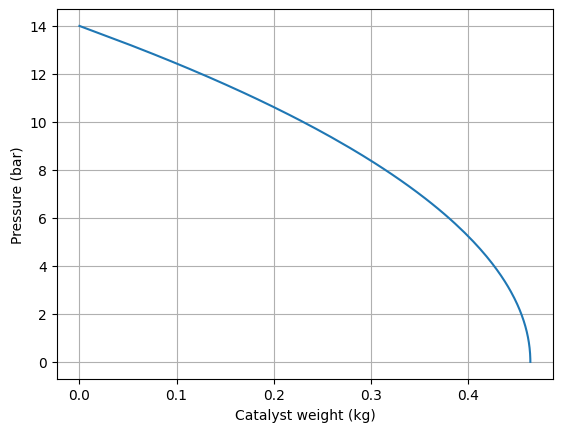

In [45]:
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
w_span = [0, 0.5]  # Catalyst weight range to 0.5kg
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
w = w 
F = sol.y.T
P = F[:, 8]
if np.any(P == None):
    print('Pressure is negative')
plt.plot(w, P)
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Pressure (bar)')
plt.grid()

# Part 3

In [47]:
def visc(y, T):
    # Constants
    Mw = np.array([16.043, 44.01, 28.01, 18.015, 2.016, 28.014, 31.999])
    Vc = np.array([98.6, 94.07, 93.1, 55.95, 65.00, 90.1, 73.37])
    Tc = np.array([190.56, 304.12, 132.85, 647.14, 33.25, 126.2, 154.58])
    w = np.array([0.011, 0.225, 0.045, 0.344, -0.216, -0.037, 0])
    dip = np.array([0.0, 0.0, 0.1, 1.8, 0, 0, 0])
    kap = np.array([0, 0, 0, 0.076, 0, 0, 0])
    # Normalize to get mole fractions
    y = y / np.sum(y)
    # Calculate individual species viscosities
    Tstar = 1.2593 * T / Tc
    dipr = 131.1 * dip / np.sqrt(Vc * Tc)
    fc = 1 - 0.2756 * w + 0.059035 * dipr**4 + kap
    ohm = 1.16145 * Tstar**-0.14874 + 0.52487 * np.exp(-0.77320 * Tstar) + 2.16178 * np.exp(-2.43787 * Tstar)
    vct = Vc**(2/3)
    visc = 40.785 * fc * (Mw * T)**0.5 / (vct * ohm)
    # Calculate mixture viscosity
    phi = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        for j in range(len(y)):
            term1 = (visc[i] / visc[j])**0.5
            term2 = (Mw[j] / Mw[i])**0.25
            term3 = Mw[i] / Mw[j]
            phi[i, j] = (1 + term1 * term2)**2 / (8 * (1 + term3))**0.5

    sumb = 0
    for i in range(len(y)):
        suma = 0
        for j in range(len(y)):
            suma += y[j] * phi[i, j]
        sumb += y[i] * visc[i] / suma

    viscm = sumb * 1e-6 / 10 # Convert to Pascals-seconds
    return viscm

def shiftc(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P, d = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Pressure drop equation
    por = 0.4  # porosity
    Dtube = d * 0.0254  # in meters (1-inch tube diameter)
    Dp = 2e-3  # diameter of spherical catalyst in meters
    epsilon = por
    rhocat = 1870  # kg_cat/m^3
    mdot = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / 1000  # in kg/s
    Area = np.pi * Dtube**2 / 4  # m^2 cross-sectional area of tube
    G = mdot / Area  # mass flux in kg/m^2-s
    y = np.array([FCH4, FCO2, FCO, FH2O, FH2, FN2, FO2])
    viscm = visc(y,T)
    MWavg = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / FT
    rho = ((P * 1e5) * MWavg) / (R * T)/ 1000  # density in kg/m^3
    Um = G / rho  # superficial velocity in m/s
    term1 = 150 * (1 - epsilon)**2 / (epsilon**3) * viscm * Um / Dp**2
    term2 = 1.75 * (1 - epsilon) / (epsilon**3) * (G * Um / Dp)
    
    # Conversion factor for dz to dw
    conv_factor = Area * rhocat * (1 - epsilon)
    dPdw = -(term1 + term2) / conv_factor / 1e5  # dP/dw in bars
    rate1 = 0
    rate2 = 0
    rate3 = 0
    rate4 = 0
    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros_like(F)

    # Methane
    dFdw[0] = -rate1 - rate2 - rate4

    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4

    # Oxygen (O2)
    dFdw[2] = -2*rate4
    #dFdw[2] = -rate4

    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3

    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2+rate3

    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3

    # Nitrogen (N2)
    dFdw[6] = 0

    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp

    #Pressure change
    dFdw[8] = dPdw

    return dFdw

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


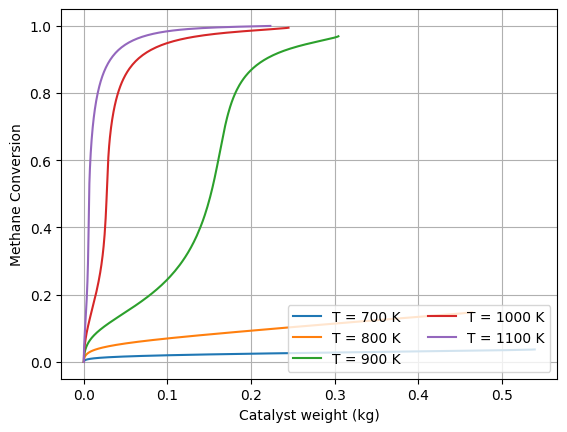

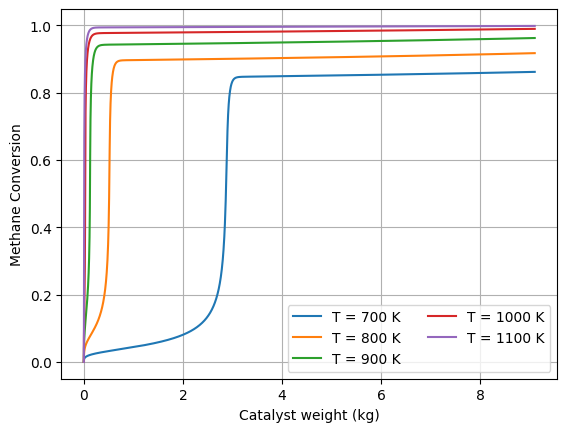

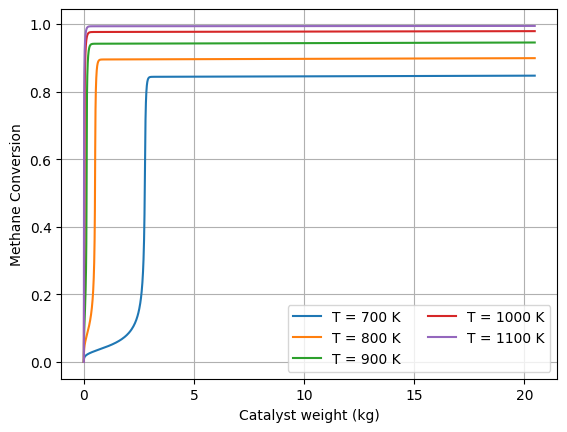

In [48]:
L = 4
diameters = [1, 2, 3]
T = 300
for d in diameters:
    plt.figure()
    for i in range(0, 5):
        T = 700 + 100*i
        F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, T, 14, d]
        w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
        w_span = [0, w]
        sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
        w = sol.t # Catalyst weight (kg)
        X = (F0[0] - sol.y.T[:, 0]) / F0[0]
        plt.plot(w, X, label='T = {} K'.format(T))
        plt.xlabel('Catalyst weight (kg)')
        plt.ylabel('Methane Conversion')
        plt.legend(loc='lower right', ncol=2)
        plt.grid()

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


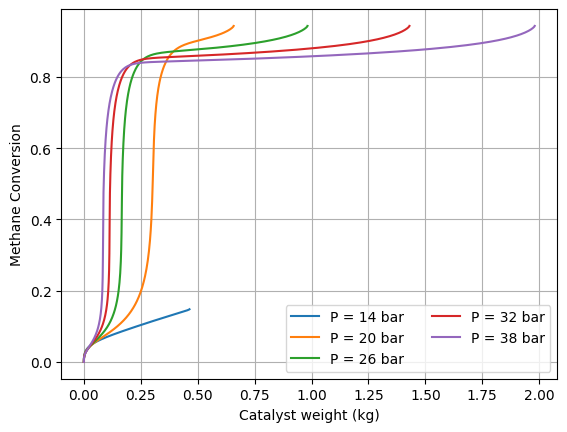

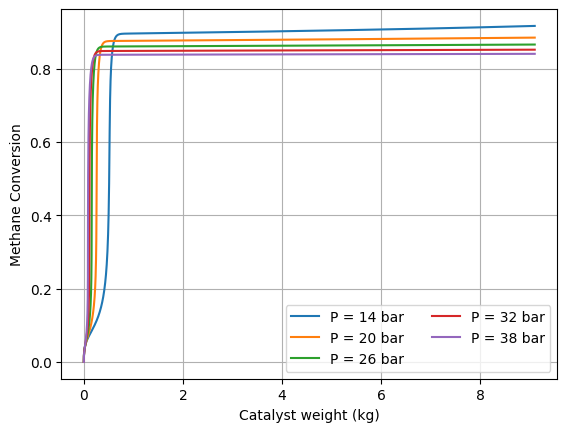

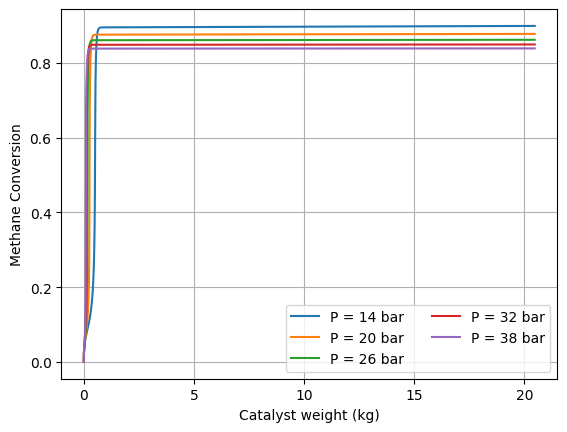

In [49]:
L = 4
diameters = [1, 2, 3]
P = 14
for d in diameters:
    plt.figure()
    for i in range(0, 5):
        P  = 14 + 6*i
        F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, P, d]
        w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
        w_span = [0, w]
        sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
        w = sol.t # Catalyst weight (kg)
        X = (F0[0] - sol.y.T[:, 0]) / F0[0]
        plt.plot(w, X, label='P = {} bar'.format(P))
        plt.xlabel('Catalyst weight (kg)')
        plt.ylabel('Methane Conversion')
        plt.legend(loc='lower right', ncol=2)
        plt.grid()

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


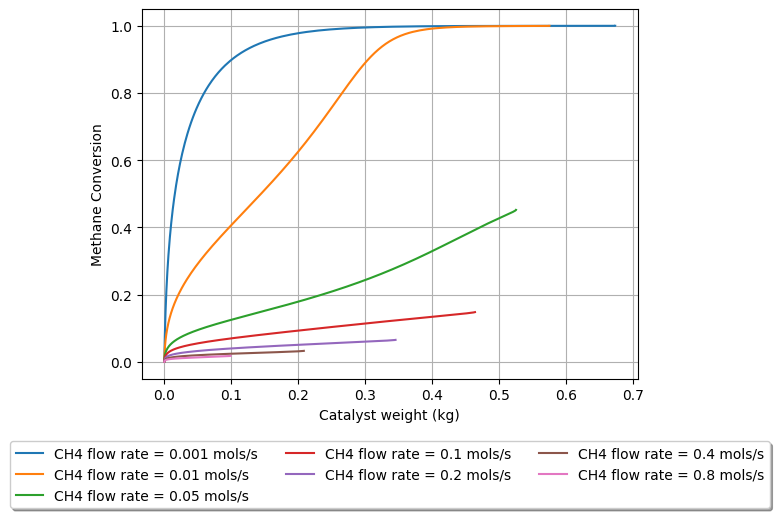

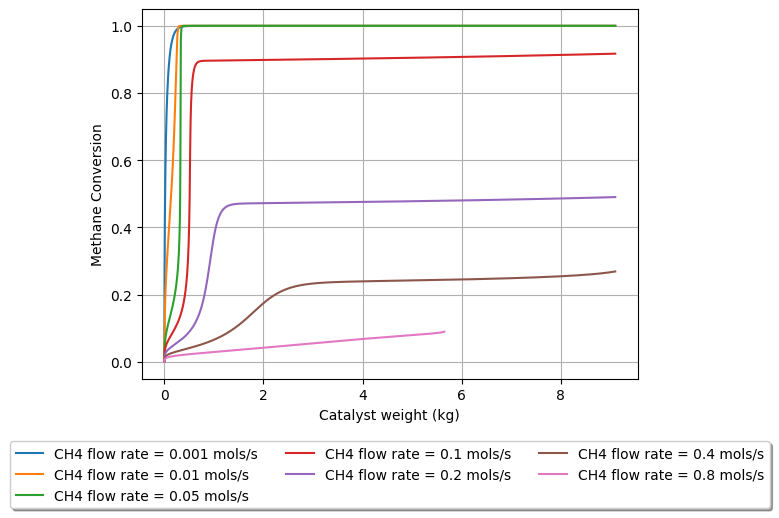

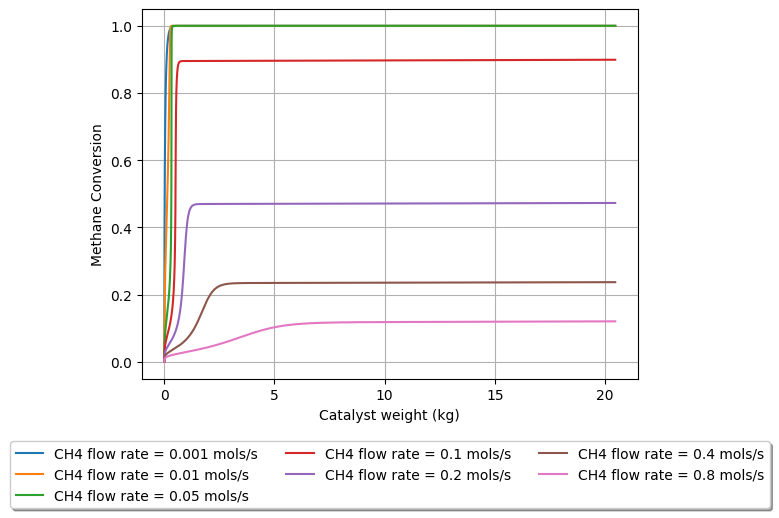

In [50]:
L = 4
diameters = [1, 2, 3]
CH4_flow = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
for d in diameters:
    plt.figure()
    for CH4 in CH4_flow:
        F0 = [CH4, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14, d]
        w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
        w_span = [0, w]
        sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
        w = sol.t # Catalyst weight (kg)
        X = (F0[0] - sol.y.T[:, 0]) / F0[0]
        plt.plot(w, X, label='CH4 flow rate = {} mols/s'.format(CH4))
        plt.xlabel('Catalyst weight (kg)')
        plt.ylabel('Methane Conversion')
        plt.grid()
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


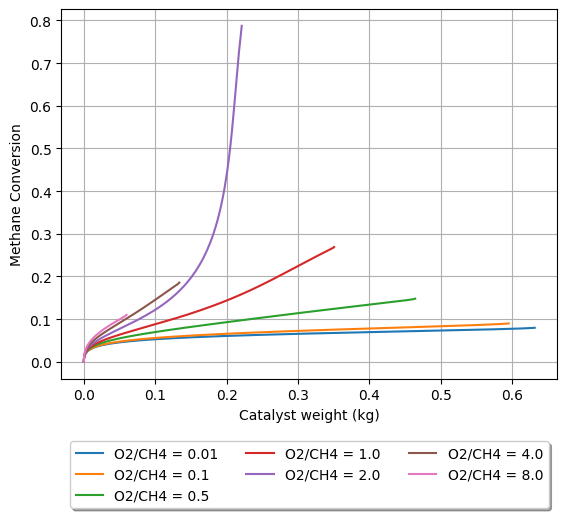

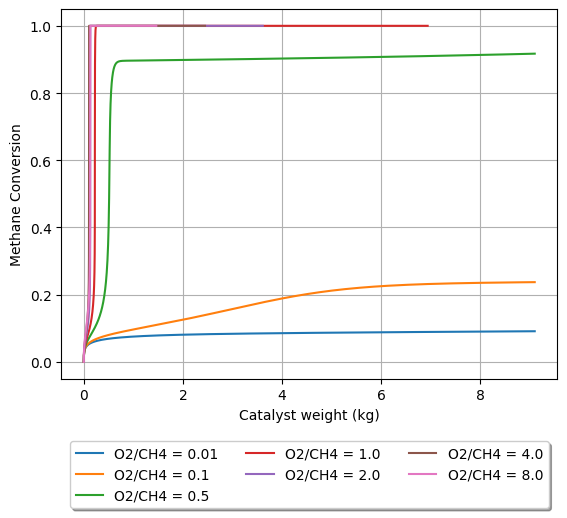

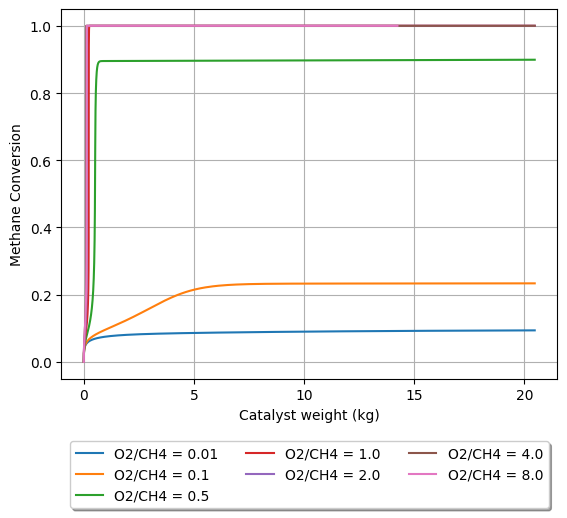

In [51]:
L = 4
diameters = [1, 2, 3]
O2_flow = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
for d in diameters:
    plt.figure()
    for O2 in O2_flow:
        F0 = [0.1, 0.15, O2, 0, 0, 0.001, 0.188, 800, 14, d]
        w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
        w_span = [0, w]
        sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
        w = sol.t # Catalyst weight (kg)
        X = (F0[0] - sol.y.T[:, 0]) / F0[0]
        O2CH4 = O2/F0[0]
        # round to 2 decimal places
        O2CH4 = round(O2CH4, 2)
        plt.plot(w, X, label='O2/CH4 = {}'.format(O2CH4))
        plt.xlabel('Catalyst weight (kg)')
        plt.ylabel('Methane Conversion')
        plt.grid()
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:91: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_18520\4278335860.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


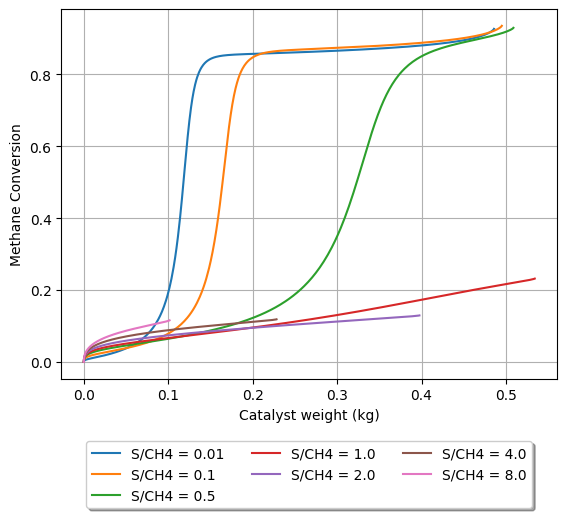

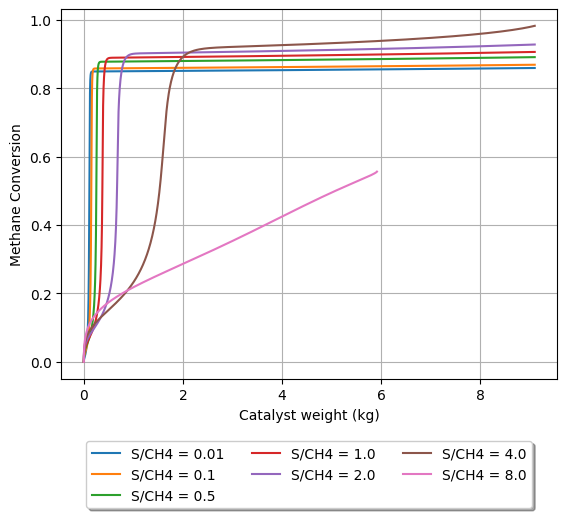

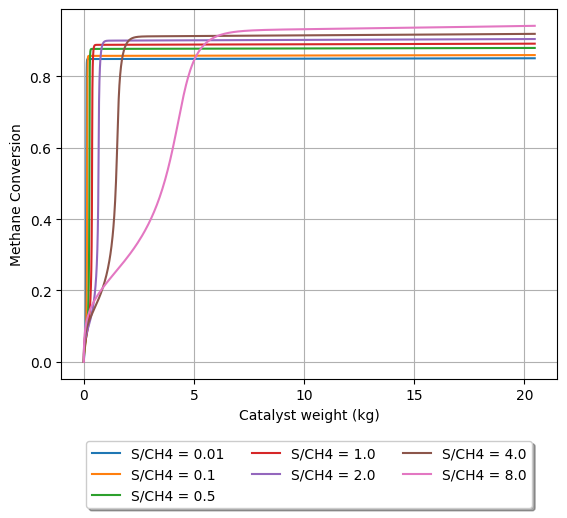

In [52]:
L = 4
diameters = [1, 2, 3]
S_flow = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
for d in diameters:
    plt.figure()
    for S in S_flow:
        F0 = [0.1, S, 0.05, 0, 0, 0.001, 0.188, 800, 14, d]
        w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
        w_span = [0, w]
        sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
        w = sol.t # Catalyst weight (kg)
        X = (F0[0] - sol.y.T[:, 0]) / F0[0]
        SCH4 = F0[1]/F0[0]
        # display 2 decimal places
        SCH4 = round(SCH4, 2)
        plt.plot(w, X, label='S/CH4 = {}'.format(SCH4))
        plt.xlabel('Catalyst weight (kg)')
        plt.ylabel('Methane Conversion')
        plt.grid()
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

4.470366039409188 CO2/H2 ratio at highest conversion


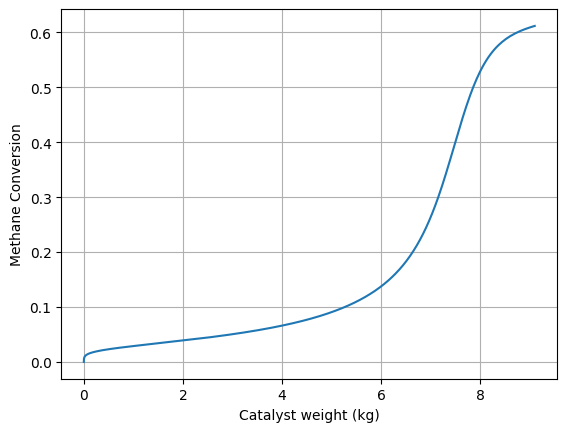

In [53]:
# combine parameters
L = 4
diameters = [1, 2, 3]
# methane, steam, oxygen, carbon monoxide, carbon dioxide, hydrogen, nitrogen
d = 2
T = 700
plt.figure()
F0 = [0.15, 0.15, 0.05, 0.000, 0.000, 0.001, 0.18, T, 10, d]
w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
w_span = [0, w]
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
X = (F0[0] - sol.y.T[:, 0]) / F0[0]
P = sol.y.T[:, 8]
T = sol.y.T[:, 7]
CO2H2_ratio = sol.y.T[:, 4] / sol.y.T[:, 5]
# convert to grams
CO2H2_ratio = CO2H2_ratio * 44 / 2
plt.plot(w, X, label='T = {} K'.format(T))
#print(X[-1], 'Final conversion for T = ', T, 'K')
print(CO2H2_ratio[-1], 'CO2/H2 ratio at highest conversion')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Methane Conversion')
#plt.legend(loc='lower right', ncol=2)
plt.grid()

In [54]:
# calculate amount of H2 produced
H2 = sol.y.T[:, 5]
H2_exit = H2[-1]
print(H2_exit, 'moles of H2 produced for one tube')
# convert to metric tons per day
H2_exit = H2_exit * 2.01568 * 3600 * 24 / 1000000
print(H2_exit, 'metric tons of H2 produced per day for one tube')
print(500/ H2_exit, 'number of tubes needed to produce 500 metric tons of H2 per day')


0.22314906660593975 moles of H2 produced for one tube
0.038862470353788925 metric tons of H2 produced per day for one tube
12865.883085871616 number of tubes needed to produce 500 metric tons of H2 per day


0.8614816792482708 Final conversion
4.270285808617074 CO2/H2 ratio at highest conversion


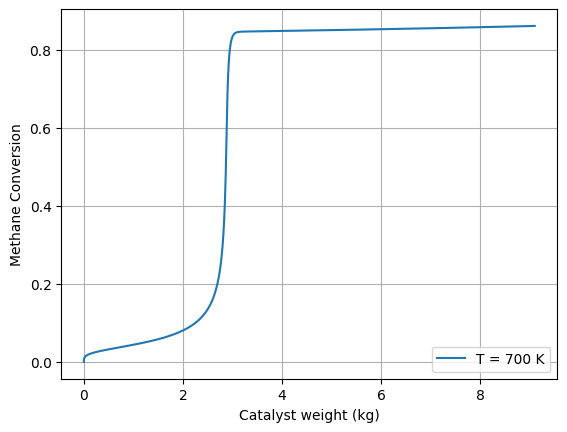

In [55]:
# can we go higher
L = 4
diameters = [1, 2, 3]
# methane, steam, oxygen, carbon monoxide, carbon dioxide, hydrogen, nitrogen
d = 2
T = 700
plt.figure()
F0 = [0.1, 0.15, 0.05, 0.00, 0.00, 0.001, 0.188, T, 14, d]
w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
w_span = [0, w]
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
X = (F0[0] - sol.y.T[:, 0]) / F0[0]
P = sol.y.T[:, 8]
CO2H2_ratio = sol.y.T[:, 4] / sol.y.T[:, 5]
# convert to grams
CO2H2_ratio = CO2H2_ratio * 44 / 2
plt.plot(w, X, label='T = {} K'.format(T))
print(X[-1], 'Final conversion')
print(CO2H2_ratio[-1], 'CO2/H2 ratio at highest conversion')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Methane Conversion')
plt.legend(loc='lower right', ncol=2)
plt.grid()

In [56]:
# calculate amount of H2 produced
H2 = sol.y.T[:, 5]
H2_exit = H2[-1]
print(H2_exit, 'moles of H2 produced for one tube')
# convert to metric tons per day
H2_exit = H2_exit * 2.01568 * 3600 * 24 / 1000000
print(H2_exit, 'metric tons of H2 produced per day for one tube')
print(500/ H2_exit, 'number of tubes needed to produce 500 metric tons of H2 per day')


0.1978474692361173 moles of H2 produced for one tube
0.034456076938643644 metric tons of H2 produced per day for one tube
14511.228335435751 number of tubes needed to produce 500 metric tons of H2 per day


0.8997367823829633 Final conversion
4.242539502260337 CO2/H2 ratio at highest conversion


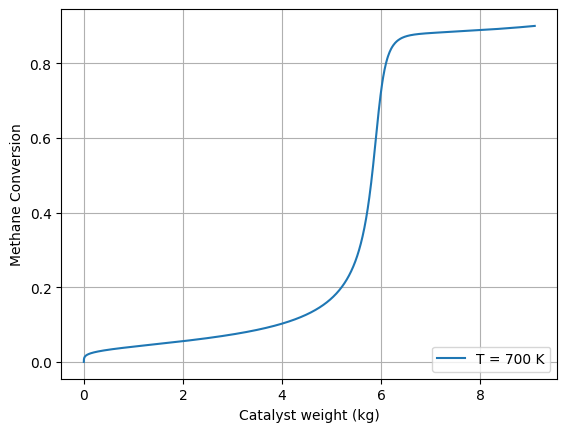

In [57]:
# can we go higher
L = 4
diameters = [1, 2, 3]
# methane, steam, oxygen, carbon monoxide, carbon dioxide, hydrogen, nitrogen
d = 2
T = 700
plt.figure()
F0 = [0.1, 0.15, 0.05, 0.00, 0.00, 0.001, 0.188, T, 10, d]
w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
w_span = [0, w]
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
X = (F0[0] - sol.y.T[:, 0]) / F0[0]
P = sol.y.T[:, 8]
CO2H2_ratio = sol.y.T[:, 4] / sol.y.T[:, 5]
# convert to grams
CO2H2_ratio = CO2H2_ratio * 44 / 2
plt.plot(w, X, label='T = {} K'.format(T))
print(X[-1], 'Final conversion')
print(CO2H2_ratio[-1], 'CO2/H2 ratio at highest conversion')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Methane Conversion')
plt.legend(loc='lower right', ncol=2)
plt.grid()

In [58]:
# calculate amount of H2 produced
H2 = sol.y.T[:, 5]
H2_exit = H2[-1]
print(H2_exit, 'moles of H2 produced for one tube')
# convert to metric tons per day
H2_exit = H2_exit * 2.01568 * 3600 * 24 / 1000000
print(H2_exit, 'metric tons of H2 produced per day for one tube')
print(500/ H2_exit, 'number of tubes needed to produce 500 metric tons of H2 per day')


0.21175687338882107 moles of H2 produced for one tube
0.03687846576932553 metric tons of H2 produced per day for one tube
13558.047754141819 number of tubes needed to produce 500 metric tons of H2 per day


0.9831051567942618 Final conversion
5.098733753499058 CO2/H2 ratio at highest conversion


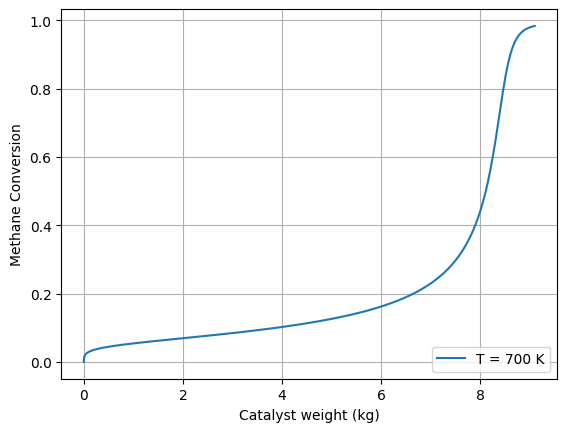

In [59]:
# here I just ran this cell multiple times for the best graph :D I am the algorithm fr
L = 4
diameters = [1, 2, 3]
# methane, steam, oxygen, carbon monoxide, carbon dioxide, hydrogen, nitrogen
d = 2
T = 700
plt.figure()
F0 = [0.15/1.9, 0.15*1.38, 0.051, 0.00, 0.00, 0.001, 0.178, T, 10, d]
w= L* np.pi * ((d*0.0254)**2 / 4) * 1870 * (1-0.4)
w_span = [0, w]
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
X = (F0[0] - sol.y.T[:, 0]) / F0[0]
P = sol.y.T[:, 8]
CO2H2_ratio = sol.y.T[:, 4] / sol.y.T[:, 5]
# convert to grams
CO2H2_ratio = CO2H2_ratio * 44 / 2
plt.plot(w, X, label='T = {} K'.format(T))
print(X[-1], 'Final conversion')
print(CO2H2_ratio[-1], 'CO2/H2 ratio at highest conversion')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Methane Conversion')
plt.legend(loc='lower right', ncol=2)
plt.grid()

In [60]:
# calculate amount of H2 produced
H2 = sol.y.T[:, 5]
H2_exit = H2[-1]
print(H2_exit, 'moles of H2 produced for one tube')
# convert to metric tons per day
H2_exit = H2_exit * 2.01568 * 3600 * 24 / 1000000
print(H2_exit, 'metric tons of H2 produced per day for one tube')
print(500/0.9/ H2_exit, 'number of tubes needed to produce 500 metric tons of H2 per day')


0.18271562119597726 moles of H2 produced for one tube
0.03182079369591136 metric tons of H2 produced per day for one tube
17458.884302654544 number of tubes needed to produce 500 metric tons of H2 per day


In [61]:
# calculate S/C ratio and O2/C ratio
print(F0[1]/F0[0], 'S/C ratio')
print(F0[2]/F0[0], 'O2/C ratio')

2.622 S/C ratio
0.646 O2/C ratio


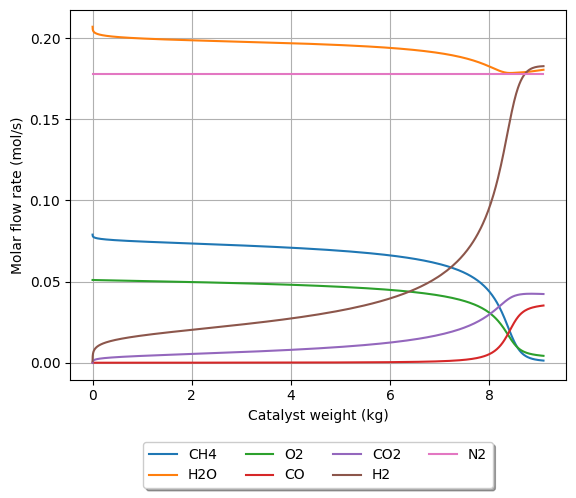

In [62]:
# final graphs! molar flow rate of all species 
FCH4 = sol.y.T[:, 0]
FH2O = sol.y.T[:, 1]
FO2 = sol.y.T[:, 2]
FCO = sol.y.T[:, 3]
FCO2 = sol.y.T[:, 4]
FH2 = sol.y.T[:, 5]
FN2 = sol.y.T[:, 6]
plt.figure()
plt.plot(w, FCH4, label='CH4')
plt.plot(w, FH2O, label='H2O')
plt.plot(w, FO2, label='O2')
plt.plot(w, FCO, label='CO')
plt.plot(w, FCO2, label='CO2')
plt.plot(w, FH2, label='H2')
plt.plot(w, FN2, label='N2')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Molar flow rate (mol/s)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.grid()


In [63]:
# get final conversions in mol percents
FCH4 = sol.y.T[-1, 0]
FH2O = sol.y.T[-1, 1]
FO2 = sol.y.T[-1, 2]
FCO = sol.y.T[-1, 3]
FCO2 = sol.y.T[-1, 4]
FH2 = sol.y.T[-1, 5]
FN2 = sol.y.T[-1, 6]
FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2
XCH4 = round(FCH4 / FT * 100, 3)
XH2O = round(FH2O / FT * 100, 3)
XO2 = round(FO2 / FT * 100, 3)
XCO = round(FCO / FT * 100, 3)
XCO2 = round(FCO2 / FT * 100, 3)
XH2 = round(FH2 / FT * 100, 3)
XN2 = round(FN2 / FT * 100, 3)
print(XCH4, 'methane mol %')
print(XH2O, 'steam mol %')
print(XO2, 'oxygen mol %')
print(XCO, 'carbon monoxide mol %')
print(XCO2, 'carbon dioxide mol %')
print(XH2, 'hydrogen mol %')
print(XN2, 'nitrogen mol %')

0.214 methane mol %
28.908 steam mol %
0.683 oxygen mol %
5.648 carbon monoxide mol %
6.781 carbon dioxide mol %
29.261 hydrogen mol %
28.506 nitrogen mol %


1040.6234694956406 final temperature


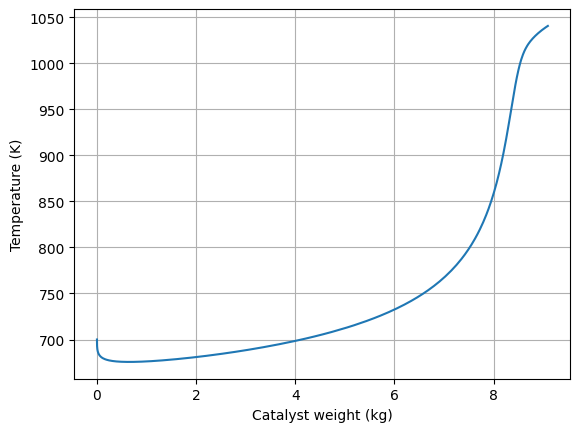

In [64]:
# temperature as a function
plt.figure()
T = sol.y.T[:, 7]
plt.plot(w, T, label='Temperature')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Temperature (K)')
plt.grid()

print(T[-1], 'final temperature')

5.359302945806475 final pressure


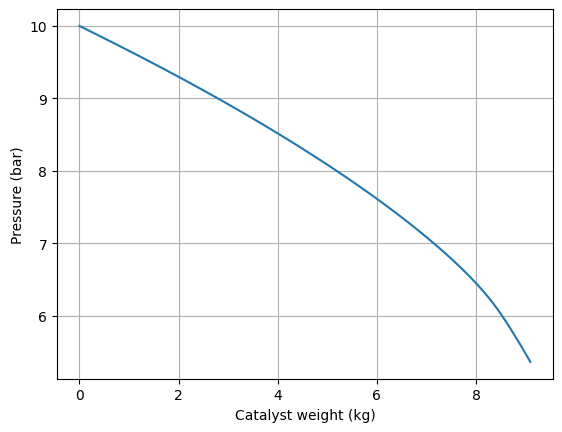

In [65]:
plt.plot(w, P, label='Pressure')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Pressure (bar)')
plt.grid()
print(P[-1], 'final pressure')

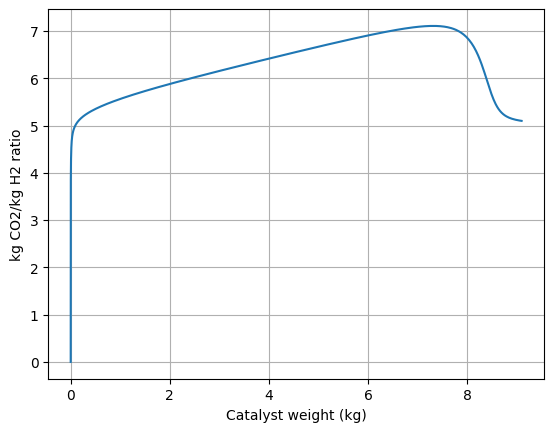

In [66]:
# plot CO2/H2 ratio
plt.figure()
CO2H2_ratio = sol.y.T[:, 4] / sol.y.T[:, 5]
# convert to kg ratio 
CO2H2_ratio = CO2H2_ratio * 44 / 2
plt.plot(w, CO2H2_ratio, label='CO2/H2 ratio')
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('kg CO2/kg H2 ratio')
plt.grid()

# I tried Genetic Modelling but it went poorly

In [67]:
# import numpy as np
# import random
# from deap import base, creator, tools, algorithms
# w_span = [0, 2.273]
# # Define the fitness function (lower is better)
# def evaluate(individual):
#     # Solve the ODE system with the given initial conditions
#     F0 = individual
#     # Penalize if F0[0] or F0[1] is zero
#     if individual[0] == 0 or individual[1] == 0:
#         fitness += 100  # Adjust the penalty weight as needed
#         return float('inf')
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     F = sol.y.T
#     # Calculate the objective function (maximize X)
#     X = (F0[0] - F[:, 0]) / F0[0]
#     fitness = -np.mean(X)  # Negative to minimize, maximizing X
#     P = F[:, 8]
#     T = F[:, 7]

#     # Calculate fitness based on constraints and desired behavior
#     fitness = 0
#     # Add penalty terms for constraint violations
#     if np.any(T >= 1500):
#         fitness += 100
#     if np.any(P <= 0):
#         fitness += 1000

#     return fitness,

# # Create the DEAP toolbox
# toolbox = base.Toolbox()
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMin)
# num_initial_conditions = 9  # Adjust as needed
# F0 = [0] * num_initial_conditions
# # Initialize the population
# def create_individual():
#     F0 = [0] * num_initial_conditions
#     for i in range(6):
#         F0[i] = random.uniform(0, 1.5)
#     F0[6] = random.uniform(10, 60)
#     F0[7] = random.uniform(800, 1500)
#     return creator.Individual(F0)

# toolbox.register("individual", create_individual)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# # Genetic operators
# toolbox.register("evaluate", evaluate)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
# toolbox.register("select", tools.selTournament, tournsize=3)

# # Main evolutionary algorithm
# pop = toolbox.population(n=100)
# hof = tools.HallOfFame(1)
# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)

# pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

# # Best solution
# best_individual = hof[0]
# best_F0 = list(best_individual)
